In [37]:
import numpy as np
import matplotlib.pyplot as plt
import time
from math import log, sqrt

In [38]:
tracex = []
trace_delb = []
trace_linucb_naive = []
trace_linucb = []

cnt = 0
alpha1 = 1
f_delb = open('DELB.txt', 'r')
while (True) :
    text = f_delb.readline()
    if (not text) :
        break
    text = text.split(' ')
    #print(text)
    cnt += 1
    num = float(text[1])
    tracex.append(float(text[0]))
    if (cnt == 1) :
        trace_delb.append(num)
    else :
        trace_delb.append(trace_delb[cnt - 2] * (1 - alpha1) + alpha1 * num)
f_delb.close()

In [39]:
cnt = 0
alpha2 = 1
f_linucb = open('LinUCB.txt', 'r')
while (True) :
    text = f_linucb.readline()
    if (not text) :
        break
    text = text.split(' ')
    cnt += 1
    num = float(text[1])
    if (cnt == 1) :
        trace_linucb.append(num)
    else :
        trace_linucb.append(trace_linucb[cnt - 2] * (1 - alpha2) + alpha2 * num)
f_linucb.close()

In [40]:
cnt = 0
alpha3 = 1
f_linucb_naive = open('LinUCB_naive.txt', 'r')
while (True) :
    text = f_linucb_naive.readline()
    if (not text) :
        break
    text = text.split(' ')
    cnt += 1
    num = float(text[1])
    if (cnt == 1) :
        trace_linucb_naive.append(num)
    else :
        trace_linucb_naive.append(trace_linucb_naive[cnt - 2] * (1 - alpha3) + alpha3 * num)
f_linucb_naive.close()

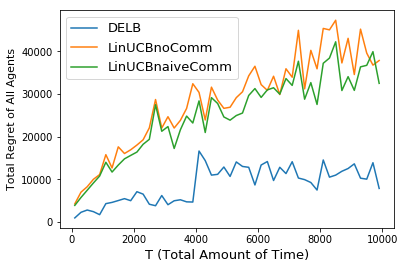

In [42]:
#tracex = range(1, len(trace_delb) + 1)

#figure, ax = plt.subplots()
plt.plot(tracex, trace_delb, label = 'DELB')
plt.plot(tracex, trace_linucb, label = 'LinUCBnoComm')
plt.plot(tracex, trace_linucb_naive, label = 'LinUCBnaiveComm')

plt.xlabel('T (Total Amount of Time)', fontsize=13)
plt.ylabel('Total Regret of All Agents', fontsize=11)
plt.legend(fontsize=13)
plt.savefig('aggregate.png')